In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Svm')
print("We are currently in the folder of ",os.getcwd())

We are currently in the folder of  /content/gdrive/MyDrive/Colab Notebooks/Svm


In [ ]:
import pandas as pd
import numpy as np
import time

In [ ]:
starting_time = time.time()
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Svm/MFCC_SVM.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")
print(data.head())

data loaded in 0.6227734088897705ms
   gender  emotion           0  ...        37        38        39
0  female  disgust -377.578125  ...  4.781407  3.359138  2.814575
1  female  disgust -374.714600  ...  3.086874  3.081059  3.720285
2  female  disgust -433.112823  ...  3.445748  3.775246  4.531673
3  female  disgust -442.021851  ...  4.383492  1.040241  0.354939
4  female  disgust -442.544098  ...  4.258040  7.560517  6.063275

[5 rows x 42 columns]


In [ ]:
data.shape

(4240, 42)

In [ ]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [ ]:
data[:10]

,gender,emotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
1986,female,neutral,-508.195740,77.640320,14.494713,18.355850,2.834102,11.566437,-12.710686,1.348004,-21.919056,2.663975,-14.993209,6.311375,-8.464427,3.737347,4.630143,5.906680,-1.393446,10.336853,-1.223108,0.192018,0.430665,0.942743,-1.020510,0.108658,-9.194904,-4.377775,-2.211800,-1.240695,-3.277591,-1.563692,-5.034977,-3.273755,-2.847079,3.044731,15.491582,25.190491,32.367435,30.549589,22.300703,8.407218
373,female,angry,-364.474030,41.745262,-12.126205,23.474796,-35.522556,6.952712,-4.642541,-8.292014,-10.897641,-1.644553,-16.466871,10.508151,-11.455934,8.946884,-3.066702,-0.485896,-4.528833,-1.176343,-9.156803,-1.846371,-5.186344,-0.204507,-4.205920,1.118013,2.543772,4.863837,7.808711,10.485640,8.850708,9.890918,8.377390,6.161752,5.442679,3.571025,0.388762,2.364304,3.807124,2.092517,1.694864,-0.613071
1974,female,neutral,-494.946991,62.398426,14.034667,5.632519,-2.848940,19.353853,-18.107262,-0.223943,-19.836599,6.226116,-14.799041,10.843206,-9.442875,12.516137,2.657558,4.265986,-4.927877,11.558161,-2.277484,-0.001519,0.954862,3.631571,-5.746117,1.446256,-11.467313,-2.466536,-0.396973,1.009457,-2.829124,-1.509876,-8.776029,-2.705968,-2.267382,8.788441,24.085434,34.095062,39.728264,29.107935,11.439588,0.545910
907,female,sad,-399.224091,62.146675,31.824741,41.552132,-6.214156,11.493938,-11.574594,-1.306283,-5.943484,-0.504689,-12.690215,5.697094,-10.932258,9.519443,-11.720684,3.823768,-4.389991,-0.551556,-10.272029,-3.128951,-10.050483,-5.795279,-4.760423,-0.236248,-2.125697,6.876237,1.195812,2.345244,2.797048,0.774883,2.408092,9.325747,6.202383,4.070235,-0.073436,1.514638,4.246548,7.308380,8.953341,5.877393
2136,female,fear,-451.813873,43.964211,9.524453,10.223670,-5.480402,11.154572,-14.368369,7.535367,-25.221264,-2.723184,-20.682322,-2.827615,-14.159430,5.888941,-6.679865,2.002669,-0.141742,4.801216,-2.527006,0.424652,7.472081,20.010412,22.223841,28.643095,22.491541,14.430321,0.294824,3.688472,1.600188,5.421784,-0.705015,-3.939030,-3.907480,-2.472017,4.322766,1.393890,-6.629773,-3.247468,-0.925337,-1.041992
1808,female,neutral,-519.540833,85.336731,21.150795,10.370946,-7.363117,10.417215,-9.761885,-5.097526,-22.296158,9.265532,-17.072081,4.039606,-8.449956,9.634842,5.036850,6.470735,-2.709606,9.065528,-3.934543,-0.897472,3.105524,-0.434533,-6.927170,-0.093519,-11.040219,0.858569,-3.769382,-1.343746,-2.354102,-2.562750,-8.387093,-4.291895,2.927320,14.300947,33.473248,35.689911,38.604294,24.573141,4.827784,0.702261
2595,female,surprised,-442.253540,93.287582,14.311192,4.568474,0.296109,2.466582,-12.172862,5.819826,-23.402983,7.247494,-18.866117,2.497541,-5.552547,3.987598,-3.819069,5.878673,-3.583137,12.300090,-1.112866,2.233911,2.056815,5.069973,-3.152758,5.680736,-1.479600,5.047848,-1.561615,4.046599,-1.255678,5.457954,0.856113,2.158521,0.209726,-1.088543,4.341118,3.680864,10.402709,13.038858,18.720434,14.609982
3518,female,sad,-641.638367,71.992035,-17.511873,27.666395,-0.072446,3.290518,-5.876066,-15.465553,-5.670415,1.011483,-2.345026,-5.897398,3.061630,-0.695960,2.122485,-1.524626,-1.908899,5.789689,4.434662,6.344675,6.377122,5.424557,6.097806,9.258265,8.536376,6.222090,5.018299,5.850450,6.635654,3.540645,3.581937,1.299388,1.192046,2.417186,1.840951,1.800827,0.644074,0.572904,-1.014936,-1.062207
2391,female,disgust,-415.147217,73.882439,8.560536,-6.847392,-10.642097,7.749190,-14.072359,6.028543,-20.583464,10.519662,-15.958517,7.442756,-7.292551,8.120937,-1.691249,6.361757,-7.452026,6.252787,-4.928512,-4.932252,-1.290180,1.459123,-3.988014,2.066066,-0.187096,3.172909,1.370718,5.510406,0.012405,6.863664,3.437264,5.934959,2.948216,3.457989,1.533489,3.376705,5.419916,5.059289,7.182681,4.129498
3388,male,calm,-713.574646,75.588020,-13.266302,24.589905,-1.648618,8.101147,-7.335643,-1.803535,-5.416414,-6.268262,4.095574,-6.745669,-0.099670,-3.670476,0.330503,0.443382,-3.205127,-0.963260,-2.815224,-

In [ ]:
#printing all columns
data.columns

Index(['gender', 'emotion', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39'],
      dtype='object')

In [ ]:

#separating features and target outputs
X = data.drop(['emotion','gender'], axis = 1).values
y = data['emotion'].values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X.shape, y.shape

((4240, 40), (4240,))

In [ ]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
# Building the SVM model 
svmclf = SVC() 
svmclf.fit(X_train, y_train) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test, y_pred_svmclf)))


In [ ]:
from sklearn.svm import SVC
import time

svclassifier = SVC(kernel = 'linear')

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))


Trained model in 59.08073973655701 ms 


In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)



              precision    recall  f1-score   support

       angry       0.76      0.89      0.82       126
        calm       0.54      0.60      0.57        35
     disgust       0.77      0.84      0.80       140
        fear       0.80      0.76      0.78       114
       happy       0.78      0.78      0.78       117
     neutral       0.84      0.83      0.84        89
         sad       0.76      0.73      0.75       107
   surprised       0.86      0.68      0.76       120

    accuracy                           0.78       848
   macro avg       0.76      0.76      0.76       848
weighted avg       0.78      0.78      0.78       848

----accuracy score 77.94811320754717 ----


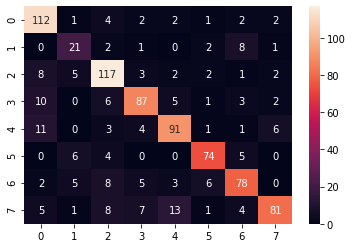

In [ ]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 82.31132075471697 ----
----test accuracy score 77.94811320754717 ----


In [ ]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.77948113 0.77122642 0.76533019 0.75471698 0.77476415]
